In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai import * 
from fastai.vision import *
from pathlib import Path

In [4]:
data_path = Path('/home/jupyter/tutorials/data/Competitions/BloodCellClassification/')

In [9]:
train_path = data_path/'dataset2-master/images'

In [6]:
org_path = data_path/'dataset-master/'

In [10]:
train_path.ls()

[PosixPath('/home/jupyter/tutorials/data/Competitions/BloodCellClassification/dataset2-master/images/TEST_SIMPLE'),
 PosixPath('/home/jupyter/tutorials/data/Competitions/BloodCellClassification/dataset2-master/images/TEST'),
 PosixPath('/home/jupyter/tutorials/data/Competitions/BloodCellClassification/dataset2-master/images/.DS_Store'),
 PosixPath('/home/jupyter/tutorials/data/Competitions/BloodCellClassification/dataset2-master/images/TRAIN')]

In [8]:
org_path.ls()

[PosixPath('/home/jupyter/tutorials/data/Competitions/BloodCellClassification/dataset-master/JPEGImages'),
 PosixPath('/home/jupyter/tutorials/data/Competitions/BloodCellClassification/dataset-master/Annotations'),
 PosixPath('/home/jupyter/tutorials/data/Competitions/BloodCellClassification/dataset-master/.DS_Store'),
 PosixPath('/home/jupyter/tutorials/data/Competitions/BloodCellClassification/dataset-master/labels.csv')]

In [7]:
train_images = train_path/'TRAIN'
test_images = train_path/'TEST'
test_simple = train_path/'TEST_SIMPLE'
labels = train_path/'../labels.csv'
test_org = org_path/'JPEGImages'
labels_org = org_path/'labels.csv'

In [8]:
print(train_images.ls(), '\n', test_images.ls(), '\n', test_simple.ls(), '\n')

[PosixPath('Data/Competitions/BloodCellClassification/dataset2-master/images/TRAIN/LYMPHOCYTE'), PosixPath('Data/Competitions/BloodCellClassification/dataset2-master/images/TRAIN/EOSINOPHIL'), PosixPath('Data/Competitions/BloodCellClassification/dataset2-master/images/TRAIN/NEUTROPHIL'), PosixPath('Data/Competitions/BloodCellClassification/dataset2-master/images/TRAIN/MONOCYTE')] 
 [PosixPath('Data/Competitions/BloodCellClassification/dataset2-master/images/TEST/LYMPHOCYTE'), PosixPath('Data/Competitions/BloodCellClassification/dataset2-master/images/TEST/EOSINOPHIL'), PosixPath('Data/Competitions/BloodCellClassification/dataset2-master/images/TEST/NEUTROPHIL'), PosixPath('Data/Competitions/BloodCellClassification/dataset2-master/images/TEST/MONOCYTE')] 
 [PosixPath('Data/Competitions/BloodCellClassification/dataset2-master/images/TEST_SIMPLE/LYMPHOCYTE'), PosixPath('Data/Competitions/BloodCellClassification/dataset2-master/images/TEST_SIMPLE/EOSINOPHIL'), PosixPath('Data/Competitions/

In [9]:
!head {labels}

In [10]:
!head {labels_org}

In [11]:
org_pred = pd.read_csv(labels_org, index_col=1)

In [12]:
org_pred.head()

,Unnamed: 0,Category
Image,,
0,NaN,NEUTROPHIL
1,NaN,NEUTROPHIL
2,NaN,NEUTROPHIL
3,NaN,NEUTROPHIL
4,NaN,NEUTROPHIL


In [50]:
!ls {test_org}

BloodImage_00000.jpg  BloodImage_00141.jpg  BloodImage_00275.jpg
BloodImage_00001.jpg  BloodImage_00142.jpg  BloodImage_00276.jpg
BloodImage_00002.jpg  BloodImage_00143.jpg  BloodImage_00277.jpg
BloodImage_00003.jpg  BloodImage_00144.jpg  BloodImage_00278.jpg
BloodImage_00004.jpg  BloodImage_00145.jpg  BloodImage_00279.jpg
BloodImage_00005.jpg  BloodImage_00147.jpg  BloodImage_00281.jpg
BloodImage_00006.jpg  BloodImage_00148.jpg  BloodImage_00282.jpg
BloodImage_00007.jpg  BloodImage_00149.jpg  BloodImage_00283.jpg
BloodImage_00008.jpg  BloodImage_00150.jpg  BloodImage_00284.jpg
BloodImage_00009.jpg  BloodImage_00152.jpg  BloodImage_00285.jpg
BloodImage_00010.jpg  BloodImage_00154.jpg  BloodImage_00287.jpg
BloodImage_00011.jpg  BloodImage_00156.jpg  BloodImage_00288.jpg
BloodImage_00012.jpg  BloodImage_00157.jpg  BloodImage_00289.jpg
BloodImage_00013.jpg  BloodImage_00158.jpg  BloodImage_00290.jpg
BloodImage_00014.jpg  BloodImage_00159.jpg  BloodImage_00291.jpg
BloodImage_00015.jpg  Blo

In [13]:
orgfnames = get_image_files(test_org)

In [14]:
orgfnames[:5]

[PosixPath('Data/Competitions/BloodCellClassification/dataset-master/JPEGImages/BloodImage_00317.jpg'),
 PosixPath('Data/Competitions/BloodCellClassification/dataset-master/JPEGImages/BloodImage_00076.jpg'),
 PosixPath('Data/Competitions/BloodCellClassification/dataset-master/JPEGImages/BloodImage_00340.jpg'),
 PosixPath('Data/Competitions/BloodCellClassification/dataset-master/JPEGImages/BloodImage_00390.jpg'),
 PosixPath('Data/Competitions/BloodCellClassification/dataset-master/JPEGImages/BloodImage_00258.jpg')]

In [15]:
help(ImageDataBunch.from_folder)

Help on method from_folder in module fastai.vision.data:

from_folder(path:Union[pathlib.Path, str], train:Union[pathlib.Path, str]='train', valid:Union[pathlib.Path, str]='valid', test:Union[pathlib.Path, str, NoneType]=None, valid_pct=None, **kwargs:Any) -> 'ImageDataBunch' method of builtins.type instance
    Create from imagenet style dataset in `path` with `train`,`valid`,`test` subfolders (or provide `valid_pct`).



ImageDataBunch.from_folder takes Train dataset and depending on valid_pct has been provided or not it creates the validation set from train itself. If there is validation folder it puts the validation data from that folder and if nothing is provided train alone is created.

In [16]:
np.random.seed(70)
data_res34 = ImageDataBunch.from_folder(path=train_path, train='TRAIN',valid='TEST', ds_tfms=get_transforms(flip_vert=True,), size=224, bs=64).normalize(imagenet_stats)

In [17]:
len(data_res34.train_dl.dl.dataset.x)

9957

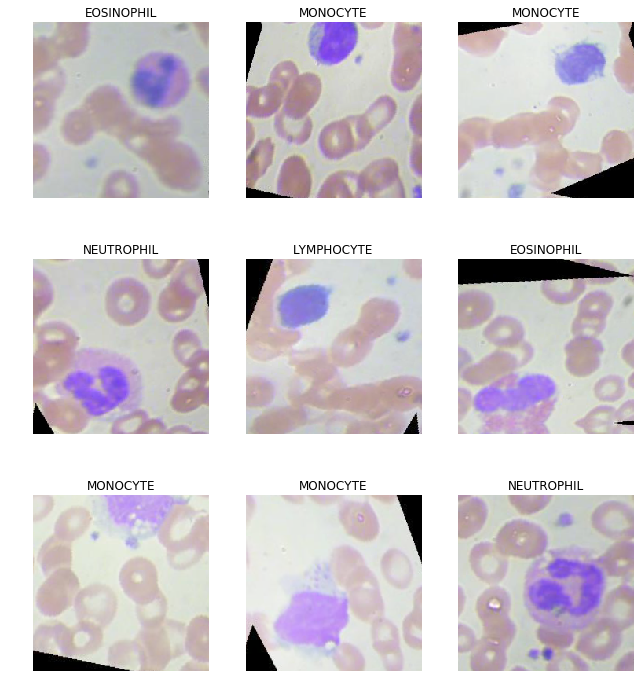

In [18]:
data_res34.show_batch(rows=3)

In [19]:
learn_res34 = create_cnn(data=data_res34, arch=models.resnet34, metrics=[error_rate, accuracy])

In [20]:
learn_res34.fit_one_cycle(3)

Total time: 02:36
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.553615    0.553861    0.195818    0.804182  (00:53)
2      0.223543    0.399699    0.133494    0.866506  (00:51)
3      0.141561    0.429066    0.143546    0.856454  (00:51)



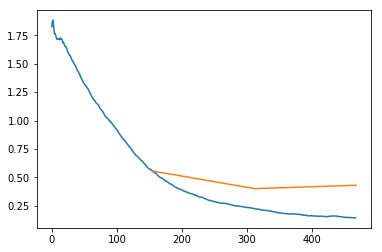

In [21]:
learn_res34.recorder.plot_losses()

In [22]:
learn_res34.save("learn_res34-3e")

Above 2 epochs the error rate was increasing. 
Validation loss has increased in 2nd epoch but error rate has gone down.

In [23]:
interpret_res34 = ClassificationInterpretation.from_learner(learn_res34)

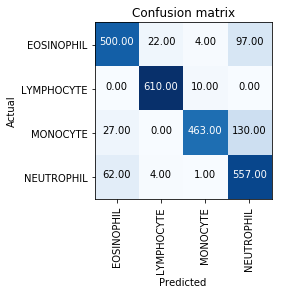

In [24]:
interpret_res34.plot_confusion_matrix()

In [25]:
interpret_res34.most_confused()

[('MONOCYTE', 'NEUTROPHIL', 130),
 ('EOSINOPHIL', 'NEUTROPHIL', 97),
 ('NEUTROPHIL', 'EOSINOPHIL', 62),
 ('MONOCYTE', 'EOSINOPHIL', 27),
 ('EOSINOPHIL', 'LYMPHOCYTE', 22),
 ('LYMPHOCYTE', 'MONOCYTE', 10),
 ('EOSINOPHIL', 'MONOCYTE', 4),
 ('NEUTROPHIL', 'LYMPHOCYTE', 4)]

Check if we can have good lr for whole model or we can improve it.

In [26]:
learn_res34.unfreeze()

In [27]:
learn_res34.fit_one_cycle(3)

Total time: 03:25
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.224207    0.394584    0.150784    0.849216  (01:09)
2      0.113888    0.934456    0.157620    0.842380  (01:07)
3      0.033395    0.707417    0.114998    0.885002  (01:08)



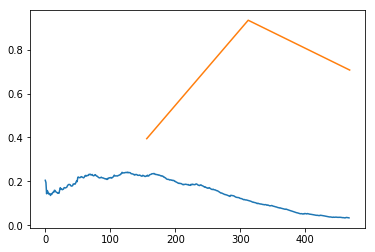

In [28]:
learn_res34.recorder.plot_losses()

 It looks like the default lr is fine and we should make it more aggressive

In [29]:
learn_res34.save("learn_res34_uf-3e")

This clearly shows that we have better LR we will use the same LR and train on unfreezed model

In [30]:
learn_res34.load('learn_res34-3e')

In [31]:
learn_res34.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


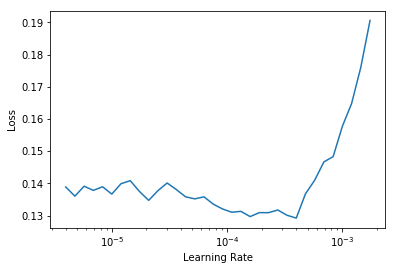

In [32]:
learn_res34.recorder.plot(skip_start=20)

In [33]:
learn_res34.unfreeze()

In [34]:
learn_res34.fit_one_cycle(5, max_lr=slice(9e-5,9e-4))

Total time: 05:44
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.087268    0.719232    0.171291    0.828709  (01:07)
2      0.075209    0.507808    0.127865    0.872135  (01:08)
3      0.046500    0.781961    0.134298    0.865702  (01:08)
4      0.014609    0.684939    0.128267    0.871733  (01:09)
5      0.005941    0.794624    0.122638    0.877362  (01:09)



In [35]:
learn_res34.save("learn-uf-34-e5")

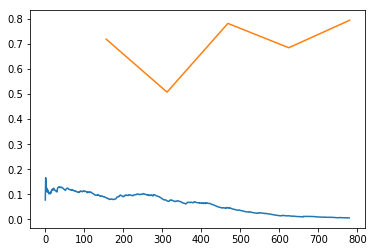

In [36]:
learn_res34.recorder.plot_losses()

The losses are decreasing but they are far apart and also the validation loss is fluctuating

In [37]:
interpret_res34_uf = ClassificationInterpretation.from_learner(learn_res34)

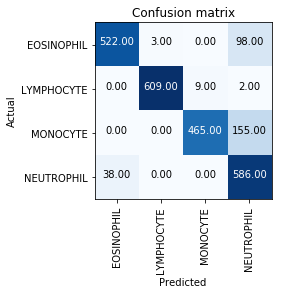

In [38]:
interpret_res34_uf.plot_confusion_matrix()

In [40]:
data2 = ImageDataBunch.single_from_classes(train_path, data_res34.classes, tfms=get_transforms(), size=224).normalize(imagenet_stats)
learn = create_cnn(data2, models.resnet34)
learn.load('learn-uf-34-e5')

In [44]:
preds = [learn.predict(open_image(img))[0] for img in orgfnames]

In [46]:
len(orgfnames)

366

In [49]:
org_pred.shape

(411, 2)

In [45]:
res = pd.DataFrame({preds, org_pred.Category})

ValueError: Shape of passed values is (1, 366), indices imply (1, 411)

In [ ]:
org_pred.Category

In [16]:
np.random.seed(70)
data50 = ImageDataBunch.from_folder(path=train_path, train='TRAIN',valid='TEST', ds_tfms=get_transforms(flip_vert=True,), size=299, bs=32).normalize(imagenet_stats)

In [17]:
learn50 = create_cnn(data50, arch=models.resnet50, metrics=[error_rate, accuracy])

In [18]:
learn50.fit_one_cycle(2)

Total time: 06:19
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.268509    0.298141    0.104946    0.895054  (03:15)
2      0.105757    0.468295    0.133896    0.866104  (03:03)



In [19]:
learn50.save("lear50-1")

In [20]:
learn50.unfreeze()

In [22]:
learn50.fit_one_cycle(1)

Total time: 04:08
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.168709    0.476663    0.130277    0.869723  (04:08)



In [24]:
learn50.load("lear50-1")

In [25]:
learn50.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


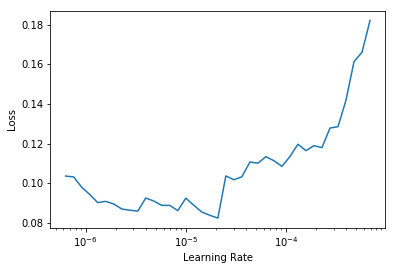

In [26]:
learn50.recorder.plot()